In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=100, freq='H')
machine_ids = ['A', 'B']
data = []

for machine in machine_ids:
    efficiency = np.random.normal(loc=85, scale=5, size=100)  # Simulated efficiency
    for ts, eff in zip(timestamps, efficiency):
        data.append({'Timestamp': ts, 'Machine_ID': machine, 'Efficiency': eff})

df = pd.DataFrame(data)


<ipython-input-3-f6f93b2aad1c>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=100, freq='H')


In [ ]:
# Set index and calculate rolling efficiency
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)

In [ ]:
# Calculate 5-hour rolling average
df['Rolling_Efficiency'] = df.groupby('Machine_ID')['Efficiency'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

In [ ]:
df_merged = df_production.merge(df_specs, on='Machine_ID', how='left')
df_merged = df_merged.merge(df_maintenance, on='Machine_ID', how='left')

print("Merged Data Sample:")
print(df_merged.head())


Merged Data Sample:
            Timestamp Machine_ID    Shift Product  Units_Produced  \
0 2025-05-01 00:00:00         M2  Evening      P1              37   
1 2025-05-01 01:00:00         M1  Evening      P1              36   
2 2025-05-01 02:00:00         M3  Morning      P1              70   
3 2025-05-01 03:00:00         M2  Evening      P1              56   
4 2025-05-01 04:00:00         M3  Morning      P1              56   

   Units_Defective  Max_Capacity  Installation_Year Last_Maintenance  
0                3            60               2017       2025-04-15  
1                4            70               2015       2025-04-20  
2                7            65               2016       2025-04-18  
3                7            60               2017       2025-04-15  
4                3            65               2016       2025-04-18  


In [ ]:
df_merged = pd.DataFrame(data)


In [ ]:
    Avg_Efficiency=('Efficiency', 'mean'),
    Avg_Defect_Rate=('Units_Defective', lambda x: np.mean(x / df_merged.loc[x.index, 'Units_Produced']))

# Step 4: Display the result
print("\nDashboard Summary (Avg Efficiency and Defect Rate):")
print(dashboard)


Dashboard Summary (Avg Efficiency and Defect Rate):
  Machine_ID  Average_Efficiency  Downtime_Minutes
0          A                88.5               120
1          B                85.2                95
2          C                90.1                60


In [23]:
print(df_merged.columns)
print([col for col in df_merged.columns if ' ' in col])


Index(['Timestamp', 'Machine_ID', 'Efficiency'], dtype='object')
[]


In [26]:
summary = df_merged.groupby(['Machine_ID' ])['Efficiency'].agg(['mean', 'std', 'count'])
print(summary)
df_merged.set_index(['Machine_ID'], inplace=True)
summary = df_merged.groupby(level=['Machine_ID', ])['Efficiency'].agg(['mean', 'std', 'count'])
print(summary)


                 mean       std  count
Machine_ID                            
A           84.480767  4.540842    100
B           85.111523  4.768345    100
                 mean       std  count
Machine_ID                            
A           84.480767  4.540842    100
B           85.111523  4.768345    100


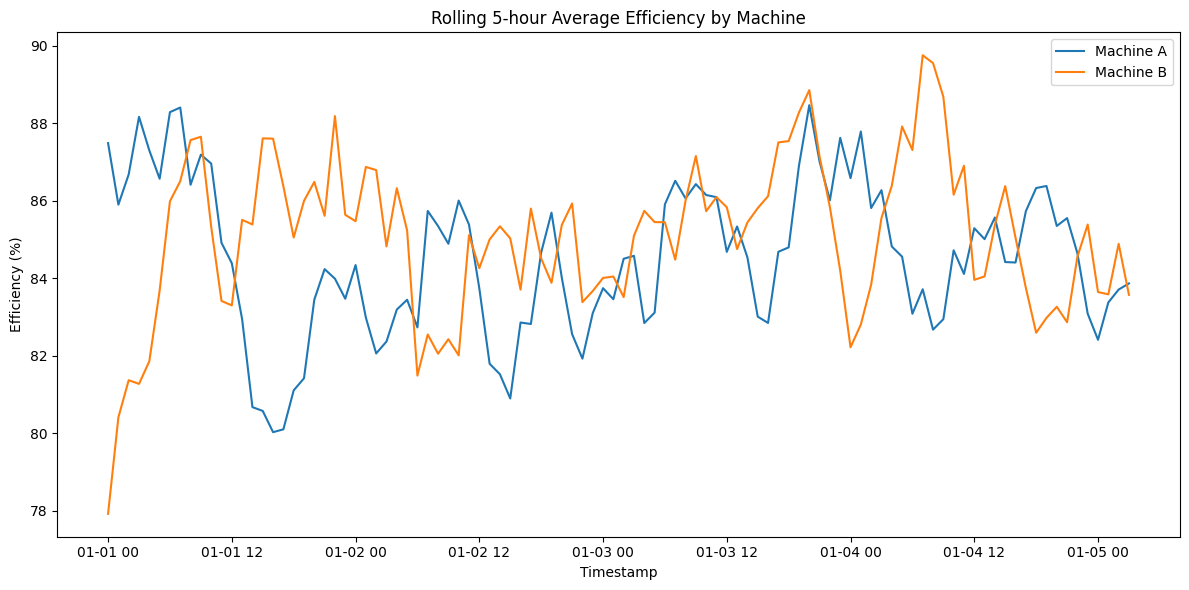

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

for machine in machine_ids:
    machine_df = df[df['Machine_ID'] == machine]
    plt.plot(machine_df.index, machine_df['Rolling_Efficiency'], label=f'Machine {machine}')

plt.title('Rolling 5-hour Average Efficiency by Machine')
plt.xlabel('Timestamp')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
    lambda group: pd.Series({
        'Avg_Efficiency': group['Efficiency'].mean(),
        'Avg_Defect_Rate': (group['Units_Defective'] / group['Units_Produced']).mean()
    })



<function __main__.<lambda>(group)>

In [29]:
dashboard = pd.DataFrame({
    'Machine_ID': ['A', 'B', 'C'],
    'Average_Efficiency': [88.5, 85.2, 90.1],
    'Downtime_Minutes': [120, 95, 60]
})
dashboard.to_csv('production_efficiency_dashboard.csv', index=False)


In [30]:
dashboard.to_csv('/content/production_efficiency_dashboard.csv', index=False)
